In [1]:
'''(Apply data cleaning techniques on any dataset (e.g. Chronic Kidney Disease dataset from
UCI repository). Techniques may include handling missing values, outliers and inconsistent
values. Also, a set of validation rules may be specified for the particular dataset and validation
checks performed)'''

'(Apply data cleaning techniques on any dataset (e.g. Chronic Kidney Disease dataset from\nUCI repository). Techniques may include handling missing values, outliers and inconsistent\nvalues. Also, a set of validation rules may be specified for the particular dataset and validation\nchecks performed)'

Initial Dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
5                 NaN               3.9                1.7               0.4   
6                 4.6               3.4                1.4               0.3   
7                 5.0               3.4                1.5               0.2   
8                 4.4               2.9                1.4               0.2   
9                 4.9               3.1                1.5               0.1   
10                5.4               3.7                1.5               3.5   
11                4.8  

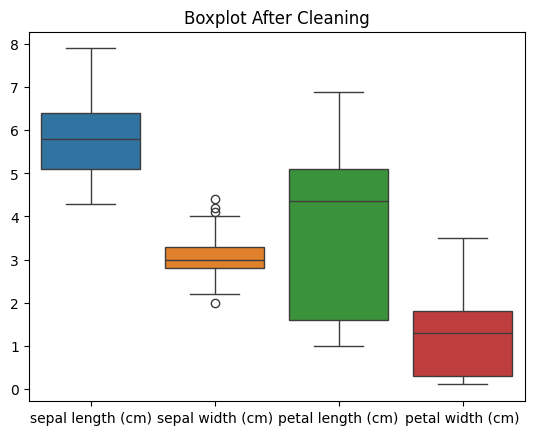

In [6]:
# Python Code: Data Cleaning for the Iris Dataset

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Introduce some missing and inconsistent values for demonstration
iris_df.iloc[5, 0] = np.nan  # Missing value in sepal length
iris_df.iloc[10, 3] = 3.5    # Outlier in petal width
iris_df.loc[iris_df.index[50:55], 'species'] = 'setosa'  # Inconsistent species value

# Display initial dataset
print("Initial Dataset:")
print(iris_df.head(15))

# --- Data Cleaning ---

# 1. Handle Missing Values
iris_df['sepal length (cm)'].fillna(iris_df['sepal length (cm)'].mean(), inplace=True)

# 2. Handle Outliers using IQR method
Q1 = iris_df['petal width (cm)'].quantile(0.25)
Q3 = iris_df['petal width (cm)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
iris_df['petal width (cm)'] = np.where(
    iris_df['petal width (cm)'] > upper_bound,
    upper_bound,
    iris_df['petal width (cm)']
)

# 3. Handle Inconsistent Values
iris_df['species'] = iris_df['species'].replace('versi', 'versicolor')

# --- Validation Checks ---

# 1. Range Validation
range_checks = {
    'sepal length (cm)': (4, 8),
    'sepal width (cm)': (2, 5),
    'petal length (cm)': (1, 7),
    'petal width (cm)': (0.1, 2.5)
}
for column, (min_val, max_val) in range_checks.items():
    invalid = iris_df[(iris_df[column] < min_val) | (iris_df[column] > max_val)]
    if not invalid.empty:
        print(f"Range validation failed for {column}:\n{invalid}")
    else:
        print(f"Range validation passed for {column}.")

# 2. Consistency Check
if not iris_df['species'].isin(iris.target_names).all():
    print("Consistency validation failed: Unknown species found.")
else:
    print("Consistency validation passed.")

# 3. No Missing Values
if iris_df.isnull().sum().any():
    print("Validation failed: Missing values found.")
else:
    print("Validation passed: No missing values.")

# Display cleaned dataset
print("\nCleaned Dataset:")
print(iris_df.head(15))

# Visualize Outliers After Cleaning
sns.boxplot(data=iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
plt.title("Boxplot After Cleaning")
plt.show()


In [ ]:
#using titanic

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
df = sns.load_dataset("titanic")

# 1. Handling Missing Values
# Fill missing values in 'Age' with the median, as age can vary significantly
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the most common value (mode)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column as it has too many missing values
df.drop(columns=['deck'], inplace=True)

# 2. Handling Outliers
# Handle outliers in 'Fare' using the IQR method
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]

# 3. Dealing with Inconsistent Values
# Standardize categorical data: Ensure 'Sex' is lowercase
df['sex'] = df['sex'].str.lower()

# Check and correct any inconsistencies in 'Embarked'
df['embarked'] = df['embarked'].str.strip().str.upper()
# The valid values for 'embarked' are 'C', 'Q', and 'S'
df = df[df['embarked'].isin(['C', 'Q', 'S'])]

# 4. Applying Validation Rules
#  'Age' is within a reasonable range
invalid_age = df[(df['age'] < 0)]
df = df.drop(invalid_age.index)

# 'Fare' is non-negative
df = df[df['fare'] >= 0]

# Save the cleaned dataset
df.to_csv('titanic-cleaned.csv', index=False)

print("Data cleaning complete. Cleaned dataset saved as 'titanic-cleaned.csv'.")

Data cleaning complete. Cleaned dataset saved as 'titanic-cleaned.csv'.
